In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
df_train = pd.read_csv('../data/downloads_drivendata/dengue_features_train.csv')
df_test = pd.read_csv('../data/downloads_drivendata/dengue_features_test.csv')
labels_train = pd.read_csv('../data/downloads_drivendata/dengue_labels_train.csv')
submission_format = pd.read_csv('../data/downloads_drivendata/submission_format.csv')
df_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [119]:
df_train = df_train.sort_values(by=['year','weekofyear'])

In [120]:
df_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [121]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1430
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  reanalysi

In [122]:
print('### SOME PRELIMINARY INFO ###')
print(f"- The dataset contains {df_train.shape[0]} rows and {df_train.shape[1]} columns.")
print(f"- The time component includes time from {df_train.year.min()} to {df_train.year.max()}")
print(f"- We have {df_train.city.value_counts().nunique()} cities to look at:")
print(df_train.city.value_counts())

### SOME PRELIMINARY INFO ###
- The dataset contains 1456 rows and 24 columns.
- The time component includes time from 1990 to 2010
- We have 2 cities to look at:
city
sj    936
iq    520
Name: count, dtype: int64


## Null values

In [123]:
df_train.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [124]:
# df_train.groupby('year').mean('ndvi_ne')['ndvi_ne'].plot.line()
# FILLED PIXEL VALUES WITH FFILL BECAUSE OF TIME COMPONENT
df_train['ndvi_ne'] = df_train['ndvi_ne'].fillna(method='ffill')
df_train['ndvi_nw'] = df_train['ndvi_nw'].fillna(method='ffill')
df_train['ndvi_se'] = df_train['ndvi_se'].fillna(method='ffill')
df_train['ndvi_sw'] = df_train['ndvi_sw'].fillna(method='ffill')

/var/folders/1x/y3znw75x2292b78hj_x2yv240000gn/T/ipykernel_19914/2534025100.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train['ndvi_ne'] = df_train['ndvi_ne'].fillna(method='ffill')
/var/folders/1x/y3znw75x2292b78hj_x2yv240000gn/T/ipykernel_19914/2534025100.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train['ndvi_nw'] = df_train['ndvi_nw'].fillna(method='ffill')
/var/folders/1x/y3znw75x2292b78hj_x2yv240000gn/T/ipykernel_19914/2534025100.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train['ndvi_se'] = df_train['ndvi_se'].fillna(method='ffill')
/var/folders/1x/y3znw75x2292b78hj_x2yv240000gn/T/ipykernel_19914/2534025100.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise 

In [125]:
# df_train.groupby('year').mean('ndvi_ne')['ndvi_ne'].plot.line()
# FILLED PIXEL VALUES WITH FFILL BECAUSE OF TIME COMPONENT
df_test['ndvi_ne'] = df_test['ndvi_ne'].fillna(method='ffill')
df_test['ndvi_nw'] = df_test['ndvi_nw'].fillna(method='ffill')
df_test['ndvi_se'] = df_test['ndvi_se'].fillna(method='ffill')
df_test['ndvi_sw'] = df_test['ndvi_sw'].fillna(method='ffill')

/var/folders/1x/y3znw75x2292b78hj_x2yv240000gn/T/ipykernel_19914/206174616.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_test['ndvi_ne'] = df_test['ndvi_ne'].fillna(method='ffill')
/var/folders/1x/y3znw75x2292b78hj_x2yv240000gn/T/ipykernel_19914/206174616.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_test['ndvi_nw'] = df_test['ndvi_nw'].fillna(method='ffill')
/var/folders/1x/y3znw75x2292b78hj_x2yv240000gn/T/ipykernel_19914/206174616.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_test['ndvi_se'] = df_test['ndvi_se'].fillna(method='ffill')
/var/folders/1x/y3znw75x2292b78hj_x2yv240000gn/T/ipykernel_19914/206174616.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a futur

In [126]:
float_columns = df_train.select_dtypes('float64').columns
float_columns

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [127]:
for col in float_columns:
   df_train[col] = df_train[col].fillna(df_train[col].mean())

In [128]:
#doing the same filling for test data :

float_columns = df_test.select_dtypes('float64').columns
float_columns

for col in float_columns:
   df_test[col] = df_test[col].fillna(df_test[col].mean())

In [129]:
#null_index = df_train[df_train.isna().any(axis=1)].index
#labels_train = labels_train.drop(null_index, axis=0)
#df_train = df_train.dropna(axis=0)
#labels_train.shape, df_train.shape

## Datatypes

In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1430
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1456 non-null   float64
 5   ndvi_nw                                1456 non-null   float64
 6   ndvi_se                                1456 non-null   float64
 7   ndvi_sw                                1456 non-null   float64
 8   precipitation_amt_mm                   1456 non-null   float64
 9   reanalysis_air_temp_k                  1456 non-null   float64
 10  reanalysis_avg_temp_k                  1456 non-null   float64
 11  reanalysi

In [131]:
# DROP WEEK START DATE BECAUSE IT SEEMS SUPERFLUOUS
df_train = df_train.drop(['week_start_date'], axis=1)


df_test = df_test.drop(['week_start_date'], axis=1)

In [139]:
df_train['city'] = df_train['city'].astype('category')

df_test['city'] = df_test['city'].astype('category')

In [150]:
def fix_53weekofyear(dataframe):
    # Define a dictionary mapping week numbers to seasons
    week_fix = {53: 52}
    dataframe['week'] = dataframe[week].map(week_fix)

def add_season_column(dataframe, week: str='weekofyear'):
    # Define a dictionary mapping week numbers to seasons
    season_mapping = {
        1: 'Winter', 2: 'Winter', 3: 'Winter', 4: 'Winter', 5: 'Winter', 6: 'Winter',
        7: 'Winter', 8: 'Winter', 9: 'Winter', 10: 'Winter', 11: 'Winter', 12: 'Spring',
        13: 'Spring', 14: 'Spring', 15: 'Spring', 16: 'Spring', 17: 'Spring', 18: 'Spring',
        19: 'Spring', 20: 'Spring', 21: 'Spring', 22: 'Spring', 23: 'Spring', 24: 'Summer',
        25: 'Summer', 26: 'Summer', 27: 'Summer', 28: 'Summer', 29: 'Summer', 30: 'Summer',
        31: 'Summer', 32: 'Summer', 33: 'Summer', 34: 'Summer', 35: 'Summer', 36: 'Summer',
        37: 'Summer', 38: 'Summer', 39: 'Summer', 40: 'Autumn', 41: 'Autumn', 42: 'Autumn',
        43: 'Autumn', 44: 'Autumn', 45: 'Autumn', 46: 'Autumn', 47: 'Autumn', 48: 'Autumn',
        49: 'Autumn', 50: 'Autumn', 51: 'Autumn', 52: 'Winter',53: 'Winter'
    }
    
    # Add a new column 'season' by mapping the week numbers to seasons
    dataframe['season'] = dataframe[week].map(season_mapping)
    
    return dataframe

In [147]:
df_train = add_season_column(df_train, 'weekofyear')

df_test = add_season_column(df_test, 'weekofyear')


In [148]:
df_train['season'] = df_train['season'].astype('category')

df_test['season'] = df_test['season'].astype('category')

In [149]:
df_train.weekofyear.value_counts()

weekofyear
18    28
19    28
46    28
47    28
48    28
49    28
50    28
51    28
1     28
2     28
3     28
4     28
5     28
6     28
7     28
8     28
9     28
10    28
11    28
12    28
13    28
14    28
15    28
16    28
17    28
45    28
44    28
43    28
42    28
20    28
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    28
30    28
31    28
32    28
33    28
34    28
35    28
36    28
37    28
38    28
39    28
40    28
41    28
52    23
53     5
Name: count, dtype: int64

In [137]:
def averageNweek(df, columnname, N: int=2):
    # N is the number of weeks to average over including current weekofyear

    # Calculate average temperature over the last N weeks including the current week
    df['last'  + str(N) + '_'+ columnname] = (df.groupby(['city', 'year'])[columnname]
                           .rolling(window=N, min_periods=1, center=True).mean()
                           .reset_index(level=[0, 1], drop=True))
    return(df)

In [138]:
df_train.columns


Index(['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'season'],
      dtype='object')

In [116]:
rolling_avg_columns = ['precipitation_amt_mm', 
                       'reanalysis_precip_amt_kg_per_m2',
                        'station_precip_mm',
                        'reanalysis_avg_temp_k',
                        'reanalysis_relative_humidity_percent',
                        'reanalysis_sat_precip_amt_mm']


df = df_train
for colname in rolling_avg_columns:
    df = averageNweek(df, colname, 2)
    df = averageNweek(df, colname, 3)
    df = averageNweek(df, colname, 4)
df_train = df

# df = averageNweek(df_train, 'precipitation_amt_mm', 2)
# df = averageNweek(df, 'precipitation_amt_mm', 3)
# df = averageNweek(df, 'precipitation_amt_mm', 4)

# df = averageNweek(df_train, 'reanalysis_precip_amt_kg_per_m2', 2)
# df = averageNweek(df, 'reanalysis_precip_amt_kg_per_m2', 3)
# df = averageNweek(df, 'reanalysis_precip_amt_kg_per_m2', 4)

# df = averageNweek(df, 'station_precip_mm', 2)
# df = averageNweek(df, 'station_precip_mm', 3)
# df = averageNweek(df, 'station_precip_mm', 4)

# df = averageNweek(df, 'reanalysis_avg_temp_k', 2)
# df = averageNweek(df, 'reanalysis_avg_temp_k', 3)
# df = averageNweek(df, 'reanalysis_avg_temp_k', 4)

# df = averageNweek(df, 'reanalysis_relative_humidity_percent', 2)
# df = averageNweek(df, 'reanalysis_relative_humidity_percent', 3)
# df = averageNweek(df, 'reanalysis_relative_humidity_percent', 4)

# df = averageNweek(df, 'reanalysis_sat_precip_amt_mm', 2)
# df = averageNweek(df, 'reanalysis_sat_precip_amt_mm', 3)
# df_train = averageNweek(df, 'reanalysis_sat_precip_amt_mm', 4)

KeyError: 'city'

In [22]:
df = averageNweek(df_test, 'precipitation_amt_mm', 2)
df = averageNweek(df, 'precipitation_amt_mm', 3)
df = averageNweek(df, 'precipitation_amt_mm', 4)

df = averageNweek(df, 'reanalysis_avg_temp_k', 2)
df = averageNweek(df, 'reanalysis_avg_temp_k', 3)
df = averageNweek(df, 'reanalysis_avg_temp_k', 4)

df = averageNweek(df, 'reanalysis_relative_humidity_percent', 2)
df = averageNweek(df, 'reanalysis_relative_humidity_percent', 3)
df = averageNweek(df, 'reanalysis_relative_humidity_percent', 4)

df = averageNweek(df, 'reanalysis_sat_precip_amt_mm', 2)
df = averageNweek(df, 'reanalysis_sat_precip_amt_mm', 3)
df_test = averageNweek(df, 'reanalysis_sat_precip_amt_mm', 4)

/var/folders/1x/y3znw75x2292b78hj_x2yv240000gn/T/ipykernel_19914/1327761267.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['last'  + str(N) + '_'+ columnname] = (df.groupby(['city', 'year'])[columnname]
/var/folders/1x/y3znw75x2292b78hj_x2yv240000gn/T/ipykernel_19914/1327761267.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['last'  + str(N) + '_'+ columnname] = (df.groupby(['city', 'year'])[columnname]
/var/folders/1x/y3znw75x2292b78hj_x2yv240000gn/T/ipykernel_19914/1327761267.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pa

## Encoding

In [23]:
import category_encoders as ce

In [24]:
ce_ohe = ce.OneHotEncoder(cols=['city', 'season'], )
df_train = ce_ohe.fit_transform(df_train)
df_train.head()

df_test = ce_ohe.fit_transform(df_test)
df_test.head()


,city_1,city_2,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,last4_precipitation_amt_mm,last2_reanalysis_avg_temp_k,last3_reanalysis_avg_temp_k,last4_reanalysis_avg_temp_k,last2_reanalysis_relative_humidity_percent,last3_reanalysis_relative_humidity_percent,last4_reanalysis_relative_humidity_percent,last2_reanalysis_sat_precip_amt_mm,last3_reanalysis_sat_precip_amt_mm,last4_reanalysis_sat_precip_amt_mm
0,1,0,2008,18,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,45.580000,298.550000,298.553571,298.553571,78.781429,78.505714,78.505714,78.60,45.580000,45.580000
1,1,0,2008,19,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,31.606667,298.553571,298.821429,298.821429,78.505714,78.427143,78.427143,45.58,31.606667,31.606667
2,1,0,2008,20,-0.0015,-0.012400,0.151083,0.091529,3.66,299.455714,...,23.705000,298.957143,299.214286,299.048214,78.250000,76.505238,77.074286,8.11,5.406667,23.705000
3,1,0,2008,21,-0.0015,-0.019867,0.124329,0.125686,0.00,299.690000,...,4.245000,299.542857,299.585714,299.328571,75.642857,75.123333,75.900000,1.83,1.473333,4.245000
4,1,0,2008,22,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,18.897500,299.700000,299.709524,299.621429,73.550000,74.552381,75.481786,0.38,23.976667,18.897500


In [25]:
# Null values ERLEDIGT
# Datatypes DONE
# Encoding DONE
# Random Forest
# Submission

In [26]:
labels_train.nunique()

city             2
year            21
weekofyear      53
total_cases    135
dtype: int64

In [27]:
labels_train['total_cases']

0       4
1       5
2       4
3       3
4       6
       ..
1451    5
1452    8
1453    1
1454    1
1455    4
Name: total_cases, Length: 1456, dtype: int64

In [43]:
df_train = df_train.drop(['year'], axis=1)

df_test = df_test.drop(['year'], axis=1)

In [44]:
X = df_train.copy()
y = labels_train['total_cases']

In [45]:
X.columns

Index(['city_1', 'city_2', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'season_1', 'season_2',
       'season_3', 'season_4', 'season_5', 'last2_precipitation_amt_mm',
       'last3_precipitation_amt_mm', 'last4_precipitation_amt_mm',
       'last2_reanalysis_avg_temp_k', 'last3_reanalysis_avg_temp_k',
       'last4_reanalysis_avg_temp_k',
       'last2_reanalysis_relative_humidity_percent',
       'last3_reanalysis_relative_humidity_percent',
       'last4_reanalysis_relative_hu

In [47]:
X.head()

,city_1,city_2,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,last4_precipitation_amt_mm,last2_reanalysis_avg_temp_k,last3_reanalysis_avg_temp_k,last4_reanalysis_avg_temp_k,last2_reanalysis_relative_humidity_percent,last3_reanalysis_relative_humidity_percent,last4_reanalysis_relative_humidity_percent,last2_reanalysis_sat_precip_amt_mm,last3_reanalysis_sat_precip_amt_mm,last4_reanalysis_sat_precip_amt_mm
0,1,0,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,17.620,297.742857,298.092857,298.092857,73.365714,75.367143,75.367143,12.42,17.62,17.620
1,1,0,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,23.260,298.092857,298.354762,298.354762,75.367143,77.595714,77.595714,17.62,23.26,23.260
2,1,0,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,21.285,298.660714,298.850000,298.573214,79.710714,79.919524,78.281071,28.68,24.24,21.285
3,1,0,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,20.060,299.053571,299.257143,299.053571,81.195000,80.950000,80.054643,24.95,19.14,20.060
4,1,0,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,16.750,299.446429,299.552381,299.383929,80.398571,80.229524,80.685357,11.44,10.82,16.750


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=False)

In [113]:
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.05, n_estimators=125)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_leaf_nodes=10,
                          n_estimators=125, random_state=42)

In [114]:
gbr_preds = gbr.predict(X_val)
gbr_preds_int = [round(x) for x in gbr_preds]
mean_absolute_error(y_val, gbr_preds_int)

14.623287671232877

In [76]:
rf = RandomForestRegressor(max_leaf_nodes=145, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(max_leaf_nodes=145, random_state=42)

In [77]:
rf_preds = rf.predict(X_val)
rf_preds_int = [round(x) for x in rf_preds]
mean_absolute_error(y_val, rf_preds_int)

13.202054794520548

## Submission

In [78]:
submission_predictions = rf.predict(df_test)
submission_predictions = [round(x) for x in submission_predictions]

In [79]:
submission_format['total_cases'] = submission_predictions
submission_format

,city,year,weekofyear,total_cases
0,sj,2008,18,13
1,sj,2008,19,13
2,sj,2008,20,12
3,sj,2008,21,13
4,sj,2008,22,22
...,...,...,...,...
411,iq,2013,22,5
412,iq,2013,23,5
413,iq,2013,24,5
414,iq,2013,25,6


In [83]:
submission_format.to_csv('submissions_3_sr.csv',sep=',',index=None)

In [81]:
pred1 = pd.read_csv('submissions_1')
pred2 = pd.read_csv('submissions_2')
pred3 = pd.read_csv('submissions_3.csv')

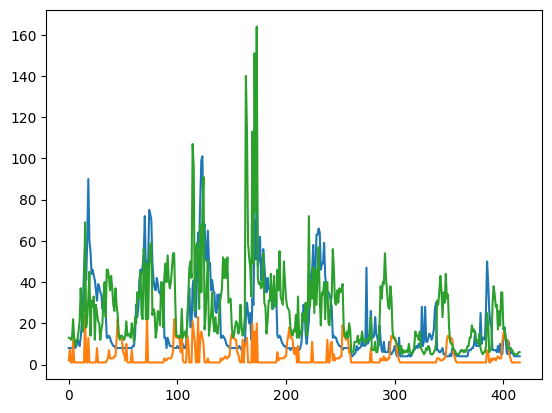

In [82]:
plt.plot(pred1.loc[:, 'total_cases'])
plt.plot(pred2.loc[:, 'total_cases'])
plt.plot(pred3.loc[:, 'total_cases'])
plt.show()

In [2]:
list1 = [1,2,3]
list2 = [4,5,6]

In [3]:
list1 + list2

[1, 2, 3, 4, 5, 6]